# Figures for Quantum Analogue Experiment

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from csv import reader

# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

## Data loading and processing

In [70]:
f = 'Lorentzian.csv'

data = []

with open(f) as f:
    csv = reader(f)
    for i,row in enumerate(csv):
        if i != 0:
            data.append(row)

data = np.array(data)

lorentx = data[:,0].astype('float')
lorenty = data[:,1].astype('float')
lorenty = lorenty/max(lorenty)

f = 'soundspeed.csv'

data = []

with open(f) as f:
    csv = reader(f)
    for i,row in enumerate(csv):
        data.append(row)

data = np.array(data)

resnum = data[:,0].astype('float')
resfreq = data[:,1].astype('float')

f = 'angular_amplitude.csv'

data = []

with open(f) as f:
    csv = reader(f)
    for i,row in enumerate(csv):
        if i != 0:
            data.append(row)

data = np.array(data).astype('float')

polar = data[:,0]                   # deg
voltage_3658 = data[:,1]            # mV
voltage_7369 = data[:,2]            # mV

## Lorentzian

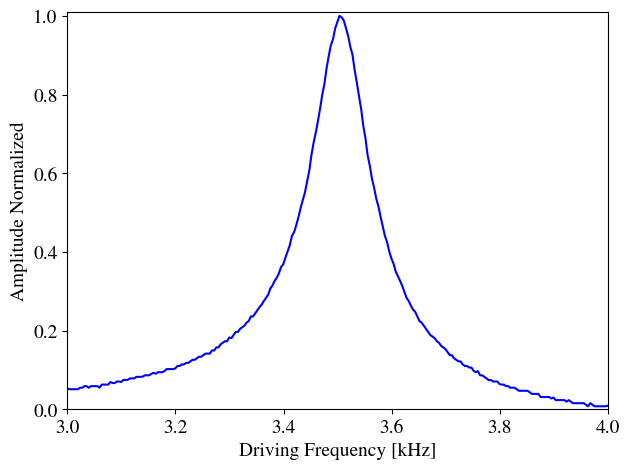

In [69]:
# Attempt to fit Lorentzian structure
'''
def lorentz(f):
    # f: frequency
    # w: FWHM
    # p0: position of maximum

    w = .16
    p0 = 3.505

    x = (f-p0)/(0.5*w)
    return 1/(1+x**2)

fit = lorentz(lorentx)'''

fig = plt.figure()
plt.plot(lorentx,lorenty,'b')
plt.xlabel('Driving Frequency [kHz]',fontsize=14)
plt.ylabel('Amplitude Normalized',fontsize=14)
plt.xlim(3,4)
plt.ylim(0,1.01)
plt.tick_params(labelsize=14)
#plt.plot(lorentx,fit)
plt.tight_layout()
#plt.savefig('Lorentzianplot.pdf')

## 1-D Resonance

chi^2: 22.1
reduced chi^2: 1.2


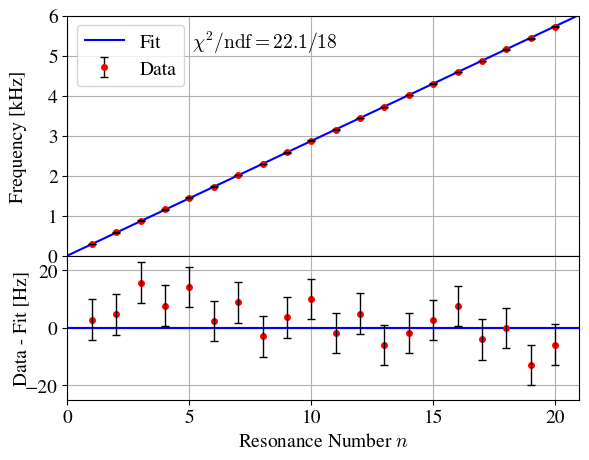

In [65]:
def soundfit(n):
    return 286.6*n

testresnum = np.array([0,22])
testresnumval = soundfit(testresnum) / 1000

soundfitval = soundfit(resnum) / 1000

residual = -1*soundfitval + resfreq/1000

diff = residual*1000
diff2 = diff**2
chi2 = sum(diff2)/49
ndf = 18
chi2_nu = chi2/ndf
print(f'chi^2: {chi2:3.1f}')
print(f'reduced chi^2: {chi2_nu:3.1f}')

fig = plt.figure()
frame1 = fig.add_axes((.1,.4,.8,.5))

plt.plot(testresnum,testresnumval,'b',label='Fit')
plt.errorbar(resnum,resfreq/1000,yerr=.007,fmt='or',label='Data',barsabove=True,markersize=4,ecolor='black',zorder=3,elinewidth=1,capsize=3)
plt.xlim(0,21)
plt.ylim(0,6)
frame1.set_xticklabels([])
plt.grid()
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
plt.ylabel('Frequency [kHz]',fontsize=14,labelpad=15)
plt.text(5.1,5.2,r'$\chi^2/\text{ndf}=22.1/18$',fontsize=14)

frame2 = fig.add_axes((.1,.1,.8,.3))
plt.hlines(0,0,21,'r')
plt.errorbar(resnum,residual*1000,yerr=7,fmt='or',label='Data',barsabove=True,markersize=4,ecolor='black',zorder=3,elinewidth=1,capsize=3)
plt.grid()
plt.xlim(0,21)
plt.ylim(-25,25)
#fig.supylabel('Frequency [kHz]',fontsize=14)
plt.xlabel(r'Resonance Number $n$',fontsize=14)
plt.hlines(0,0,21,'b')
plt.tick_params(labelsize=14)
plt.ylabel('Data - Fit [Hz]',fontsize=14,labelpad=-4)

#plt.savefig('1d_resonance.pdf')

## Legendre Polynomials

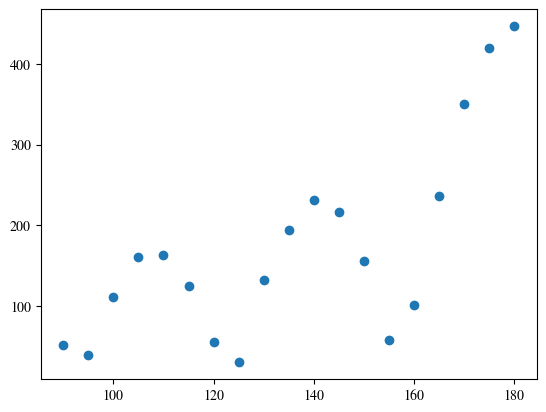

In [76]:
coses = np.cos(polar*np.pi/180)
plt.plot(polar,voltage_7369,'o')
plt.plot(polar,voltage_3658,'o')